In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

In [77]:
crime=pd.read_csv('crime_data.csv',index_col=0)

In [78]:
print(crime.info())

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB
None


In [79]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [80]:
crime

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [81]:
scaler=StandardScaler()
crime_scaled=scaler.fit_transform(crime.iloc[:,1:])

In [82]:
crime_scaled

array([[ 0.79078716, -0.52619514, -0.00345116],
       [ 1.11805959, -1.22406668,  2.50942392],
       [ 1.49381682,  1.00912225,  1.05346626],
       [ 0.23321191, -1.08449238, -0.18679398],
       [ 1.2756352 ,  1.77678094,  2.08881393],
       [ 0.40290872,  0.86954794,  1.88390137],
       [-0.73648418,  0.79976079, -1.09272319],
       [ 0.81502956,  0.45082502, -0.58583422],
       [ 1.99078607,  1.00912225,  1.1505301 ],
       [ 0.48775713, -0.38662083,  0.49265293],
       [-1.51224105,  1.21848371, -0.11129987],
       [-0.61527217, -0.80534376, -0.75839217],
       [ 0.94836277,  1.21848371,  0.29852525],
       [-0.70012057, -0.03768506, -0.0250209 ],
       [-1.39102904, -0.5959823 , -1.07115345],
       [-0.67587817,  0.03210209, -0.34856705],
       [-0.74860538, -0.94491807, -0.53190987],
       [ 0.94836277,  0.03210209,  0.10439756],
       [-1.06375661, -1.01470522, -1.44862395],
       [ 1.56654403,  0.10188925,  0.70835037],
       [-0.26375734,  1.35805802, -0.531

In [86]:
#elbow curve within sum of square values
wcss=  []

for i in range(1,11):
    Kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    Kmeans.fit(crime_scaled)
    wcss.append(Kmeans.inertia_)
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


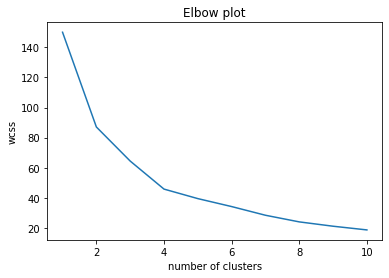

In [88]:
plt.plot(range(1,11),wcss)
plt.title('Elbow plot')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [89]:
#from this we decide the no. of clusters to be=4

In [90]:
#model for k-means
clusters_new=KMeans(4,random_state=42)
clusters_new.fit(crime_scaled)

KMeans(n_clusters=4, random_state=42)

In [91]:
clusters_new.labels_

array([0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 3, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 1, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 1, 1,
       3, 1, 1, 3, 3, 1])

In [92]:
crime['clusterid']=clusters_new.labels_

In [93]:
crime

,Murder,Assault,UrbanPop,Rape,clusterid
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,0


In [96]:
clusters_new.cluster_centers_

array([[ 0.88321132, -0.82279055,  0.01946669],
       [-0.38799965,  0.52061217, -0.21052069],
       [ 1.19960221,  0.74266221,  1.41426923],
       [-1.13648381, -1.09083666, -1.04566193]])

In [98]:
crime.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,5.960000,138.750000,73.000000,19.280000
2,2,10.809091,269.727273,76.181818,34.345455
3,3,3.618182,77.000000,49.909091,11.536364


In [101]:
# Q2
#Airlines

Airline=pd.read_excel('data.xlsx')

In [102]:
Airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [103]:
Airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [105]:
Airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [111]:
Airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [113]:
#standarizing the value
scaler=StandardScaler()
Airline_scaled=scaler.fit_transform(Airline.iloc[:,0:])

In [114]:
Airline_scaled

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [119]:
#finding optimum no of cluster

wcss=  []
for i in range(1,20):
    Kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    Kmeans.fit(Airline_scaled)
    wcss.append(Kmeans.inertia_)


NameError: name 'ylabel' is not defined

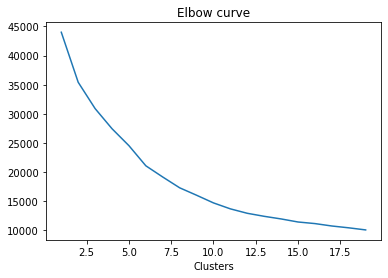

In [121]:
plt.plot(range(1,20),wcss)
plt.title('Elbow curve')
plt.xlabel('Clusters')
plt,ylabel('wcss')
plt.show()

In [1]:
#no. of clusters to be created is 15
# cluster model
clusters_new=KMeans(15,random_state=11000)
clusters_new.fit(Airline_scaled)

NameError: name 'KMeans' is not defined

In [125]:
clusters_new.labels_

array([ 1,  1,  1, ...,  0, 14, 14])

In [126]:
Airline['clusterid']=clusters_new.labels_

In [127]:
Airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,9
3995,64385,0,1,1,1,981,5,0,0,1395,1,9
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,14


In [129]:
clusters_new.cluster_centers_

array([[-8.25044444e-02, -1.41237723e-01,  1.03813483e+00,
        -9.82418871e-02, -6.27665798e-02,  5.29048227e-01,
         6.26114364e-01, -1.66745241e-01, -1.86391511e-01,
         2.08070144e-01,  1.30391816e+00],
       [-2.60521248e-01, -1.62223219e-01, -6.94202484e-01,
        -9.82418871e-02, -5.58629121e-02, -5.89952461e-01,
        -6.31371809e-01, -2.26137521e-01, -2.42417264e-01,
         7.78828510e-01, -7.66919299e-01],
       [-1.18754269e-01, -1.69416244e-01,  8.32501990e-02,
        -9.82418871e-02, -6.27665798e-02, -1.54620760e-01,
         6.41418727e-01, -2.42274515e-01, -2.69688517e-01,
        -6.87388785e-01, -7.61767962e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01],
       [ 8.77327678e-01,  6.66551533e-01,  3.39060742e-01,
        -9.82418871e-02, -6.27665798e-02,  1.13308837e+00,
  

In [132]:
Airline.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,65287.926966,34.857678,3.488764,1,1.000000,29920.275281,17.614232,226.606742,0.666667,4548.198502,1.000000
1,1,47350.408356,18.623989,1.103774,1,1.001348,2898.704852,5.539084,143.455526,0.454178,5726.743935,0.000000
2,2,61635.283582,13.059701,2.174129,1,1.000000,13411.072139,17.761194,120.863184,0.350746,2699.186567,0.002488
3,3,138061.400000,78.800000,3.466667,1,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,4,162003.552632,659.736842,2.526316,1,1.000000,44506.605263,38.210526,10006.973684,26.026316,4246.315789,0.947368
5,5,723118.552632,333.736842,3.526316,1,1.000000,57049.184211,21.078947,1287.526316,5.000000,6391.473684,0.842105
6,6,119602.080000,7352.200000,1.760000,1,1.000000,14299.560000,11.480000,1225.640000,3.560000,4572.240000,0.640000
7,7,127393.152850,6.150259,3.733161,1,1.002591,33658.417098,16.694301,166.432642,0.448187,5258.373057,0.000000
8,8,96498.823529,3226.088235,2.073529,1,1.000000,18507.691176,11.308824,538.102941,1.661765,3680.632353,0.500000
